# Simple gradient descent optimization

1) One dimensional
2) N dimensional

More optimizations to follow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def ols_cost_function(y_true: np.array, y_hat: np.array) -> float:
    # simple OLS loss function
    n = len(y_true)
    return 1 / (2 * n) * sum((y_hat - y_true)**2)


def gradient_theta_0(
    y: np.array, x: np.array, theta_0: float, theta_1: float
) -> float:
    n = len(y)
    return (1 / n) * sum((linear_fit(x, theta_0, theta_1) - y))


def gradient_theta_1(
    y: np.array, x: np.array, theta_0: float, theta_1: float
) -> float:
    n = len(y)
    return (1 / n) * sum(x * (linear_fit(x, theta_0, theta_1) - y))


def linear_fit(x: np.array, theta_0: float, theta_1: float) -> np.array:
    return theta_0 + theta_1 * x


class GradienDescent:

    def __init__(self, cost_function: str) -> None:
        self._func_dict = self._check_cost_function(cost_function)
        self.learning_frame = None
        self.thetas = []
        self.X = None
        self.y = None

    @staticmethod
    def _check_cost_function(cf):
        if cf == "OLS":
            return dict(
                cost_function=ols_cost_function,
                gradients=[gradient_theta_0, gradient_theta_1],
                fit_function=linear_fit  
                 


            )
        else:
            raise NotImplementedError("only OLS implemented")

    def fit(self, X, y, alpha=0.0001, steps=10_000, **kwargs):
        # gradient descent
        start_thetas = kwargs.get("start_vals", [0, 0])
        loss_values = []
        thetas_0 = []
        thetas_1 = []
        for step in range(steps):
            if step == 0:
                theta_0 = start_thetas[0]
                theta_1 = start_thetas[1]

            thetas_0.append(theta_0)
            thetas_1.append(theta_1)
            # calc current loss
            current_loss = self._func_dict["cost_function"](
                y, self._func_dict["fit_function"](X, theta_0, theta_1)
            )
            # print(f"current loss: {current_loss}")

            loss_values.append(current_loss)
            # calc gradients and update simultanousely
            temp_theta_0 = theta_0 - alpha * self._func_dict["gradients"][0](
                        y, X, theta_0, theta_1
                    )

            temp_theta_1 = theta_1 - alpha * self._func_dict["gradients"][1](y, X, theta_0, theta_1)
            theta_0 = temp_theta_0
            theta_1 = temp_theta_1

        self.learning_frame = pd.DataFrame(
            dict(
                loss=loss_values,
                theta_0=thetas_0,
                theta_1=thetas_1,
                n_iter=list(range(steps))
            )
        )

        self.thetas = [theta_0, theta_1]
        self.X = X
        self.y = y

    def predict(self, X):
        return linear_fit(X, *self.thetas)

    def show_learning(self):
        theta_0_range = np.linspace(0, 800, 50)
        theta_1_range = np.linspace(-5, 5, 50)
        loss_hypo = []
        x_coords = []
        y_coords = []
        for t_0 in theta_0_range:
            for t_1 in theta_1_range:
                x_coords.append(t_0)
                y_coords.append(t_1)
                cost_value = self._func_dict["cost_function"](
                    self.y, self._func_dict["fit_function"](self.X, t_0, t_1)
                )
                loss_hypo.append(cost_value)

        fig = plt.figure(figsize=(15, 15))

        ax = fig.add_subplot(221)
        self.learning_frame.tail(-1).plot(
            kind="line", x="n_iter", y="loss", ax=ax
        )

        ax = fig.add_subplot(222, projection='3d')
        ax.plot_trisurf(
            x_coords,
            y_coords,
            np.array(loss_hypo),
            linewidth=0,
            antialiased=False,
            cmap="viridis",
            alpha=0.2
        )
        ax.scatter(
            self.learning_frame["theta_0"],
            self.learning_frame["theta_1"],
            zs=self.learning_frame["loss"],
            zorder=10,
            color="goldenrod"
        )

        ax = fig.add_subplot(223)
        ax.plot(
            self.learning_frame["theta_0"],
            self.learning_frame["loss"],
            color="goldenrod"
        )

        ax = fig.add_subplot(224)
        ax.plot(
            self.learning_frame["theta_1"],
            self.learning_frame["loss"],
            color="goldenrod"
        )

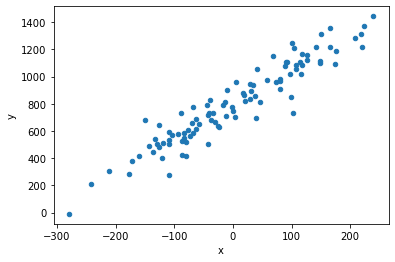

In [4]:
# true parameters
np.random.seed(123)
x = np.random.randn(100) * 100
true_theta_0 = 800
true_theta_1 = 2.5
epsilon = np.random.randn(100) * 100
y = true_theta_0 + true_theta_1 * x + epsilon
plot_frame = pd.DataFrame(
    dict(y=y, x=x)
)
plot_frame.plot(x="x", y="y", kind="scatter")

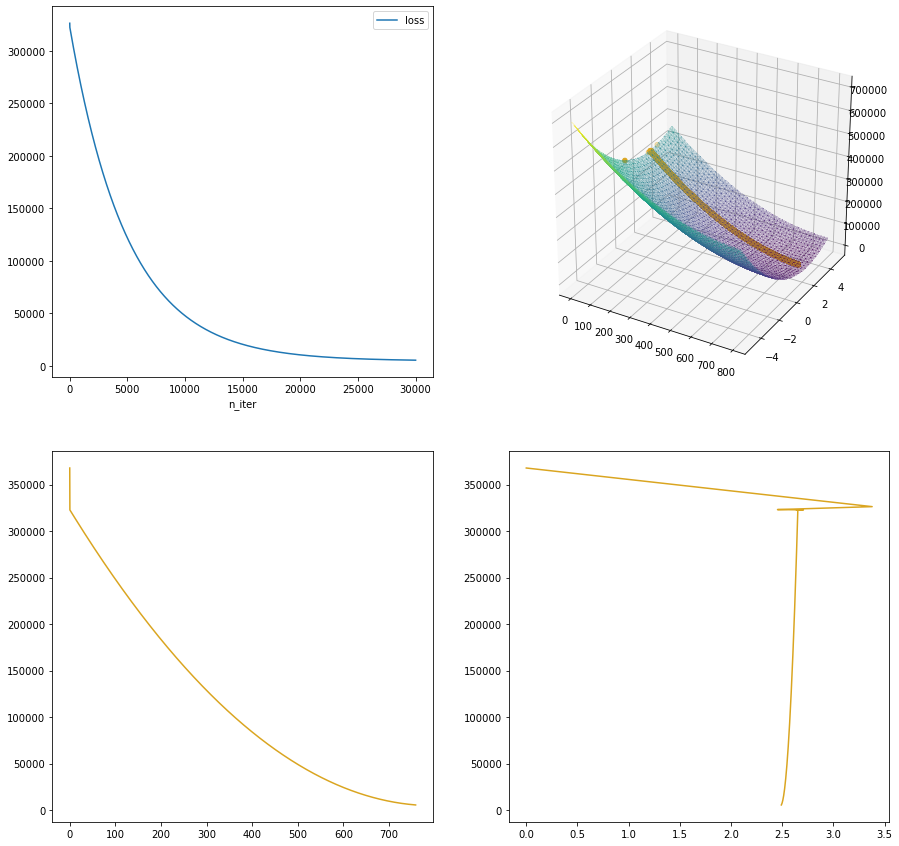

In [5]:
# defaults
ols_gradient_descent = GradienDescent("OLS")
# just let it go for fixed durations
ols_gradient_descent.fit(X=x, y=y, steps=30_000)
ols_gradient_descent.show_learning()